In [10]:
# Importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Part 1: Prepare the Data


1

In [3]:
# reading CSV into DataFrame
df = pd.read_csv("myopia.csv")
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


2

In [4]:
# Dropping the MYOPIC Columns
myopia = df.drop(columns = 'MYOPIC')
myopia.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


3

In [5]:
#standardizing the entire dataset by replacing caluyes with the Z-Score
# Z = (X - X.mean())/X.std()
myopia = (myopia - myopia.mean())/myopia.std()
myopia.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,-0.419879,-1.362813,-0.892139,0.483392,-0.281215,-1.018966,4.147301,1.696076,-0.688753,-0.672451,0.183909,0.497901,0.986339,1.002429
1,-0.419879,-0.308362,-0.171701,0.535477,-0.967214,-0.130657,-0.998090,-0.911324,-0.361582,-0.221230,-0.340656,-0.874379,0.986339,1.002429
2,-0.419879,0.603897,-0.009969,-0.506218,-0.177668,0.215634,0.256884,-0.911324,-0.034411,-0.672451,0.183909,-0.749627,-1.012210,-0.995962
3,-0.419879,-0.440968,-0.436349,1.229940,0.456557,-0.973798,0.758873,2.673851,-0.688753,-0.672451,-0.865222,0.685030,-1.012210,1.002429
4,-1.822502,-0.166171,1.166259,0.422627,-0.565969,1.179223,0.256884,-0.911324,-0.688753,-0.672451,-0.865222,-1.373390,0.986339,-0.995962


# Part 2: Apply Dimensionality Reduction

1

In [6]:
#setting variables
x = myopia
x.shape

(618, 14)

In [7]:
# using PCA for Dimensionality Reduction
# importing important Libraries
from sklearn.decomposition import PCA
# 90% of the explained variance
pca = PCA(n_components = 0.90)
x_pca = pca.fit_transform(x)
x_pca.shape

(618, 10)

2

In [8]:
# Using t-SNE for further Dimensionality Reduction
# importing important Libraries
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=3)
x_tsne = tsne.fit_transform(x_pca)
x_tsne.shape

(618, 2)

3

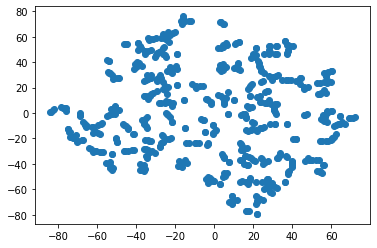

In [11]:
# Cluster Analysis for tSNE output
tSNE_output = pd.DataFrame(x_tsne)
plt.scatter(tSNE_output[0],tSNE_output[1])

### After reviewing the scatter plot on t-SNE output, the clusters thus formed look linearly separable

# Part 3 : perform a Cluster Analysis with K-means

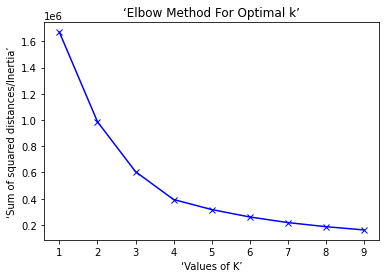

In [12]:
# importing important Libraries
from sklearn.cluster import KMeans
# ELBOW Method to find no of clusters
Sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(x_tsne)
 Sum_of_squared_distances.append(kmeans.inertia_)
#plotting the graph
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('‘Values of K’') 
plt.ylabel('‘Sum of squared distances/Inertia’') 
plt.title('‘Elbow Method For Optimal k’')
plt.show()

### With implementation of the Elbow method it is clearly visible that the elbow is forming at 4(Value of K) which shows the patients should be grouped into 4 Clusters based on their data.

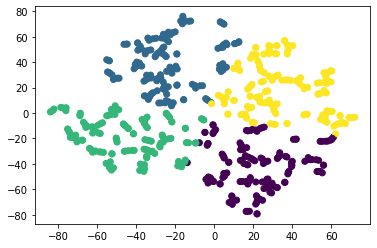

In [13]:
# using Kmeans Clustering Algorithm 
k = KMeans(n_clusters=4)
k.fit(tSNE_output)

# plotting the clusters 
plt.scatter(tSNE_output[0],tSNE_output[1],c=k.labels_)
plt.show()

### While looking at the myopic values it can be said that there should be only 2 clusters, as either its Myopic or Not-Myopic. Checking the visual representation of the plots when only 2 clusters are to be considered.


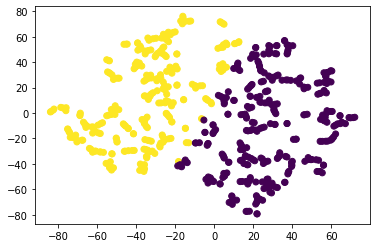

In [14]:
# using Kmeans Clustering Algorithm for 2 clusters 
k = KMeans(n_clusters=2)
k.fit(tSNE_output)

# plotting the clusters 
plt.scatter(tSNE_output[0],tSNE_output[1],c=k.labels_)
plt.show()

# Part 4: Make a Recommendation

### The elbow method is a commonly used technique for determining the optimal number of clusters in unsupervised learning. In this case, the elbow plot suggests that there should be 4 clusters. However, since we have a target column that indicates whether a person has myopia or not, we already know that there should be two clusters - one for people with myopia and one for people without myopia. This highlights one of the limitations of unsupervised learning compared to supervised learning algorithms, which are able to incorporate target labels into the learning process to achieve more accurate predictions.